# Análise dos Resultados - Detecção de Conteúdo Tóxico em Músicas

Este notebook contém a análise dos resultados do projeto de detecção de conteúdo tóxico em músicas. Vamos explorar:

1. Evolução temporal do conteúdo tóxico
2. Rankings e visualizações dos resultados
3. Insights sobre as classificações


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurações de estilo
sns.set_theme(style='whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = [12, 6] 

# Carregar os dados
df = pd.read_csv('results/relacionamentos_toxicos_20250615_031911.csv')

# Mapear níveis de toxicidade para valores numéricos
nivel_map = {
    'na': 0.0,
    'muito baixo': 0.1,
    'baixo': 0.2, 
    'moderado': 0.3,
    'alto': 0.8,
    'muito alto': 1.0
}

# Converter campos booleanos para inteiros
bool_columns = ['abuso_emocional', 'ciume_possessividade', 'dependencia', 
                'objetificacao', 'violencia_traicao']
for col in bool_columns:
    df[col] = df[col].astype(str).str.lower().map({'true': 1, 'false': 0}).fillna(0)

# Criar score médio de toxicidade (média dos tipos presentes)
df['score_medio'] = df[bool_columns].mean(axis=1)

# Converter nível de toxicidade para valores numéricos
df['nivel_numerico'] = df['nivel_toxicidade'].str.lower().map(nivel_map)

# Renomear colunas para português
column_names = {
    'abuso_emocional': 'Abuso Emocional',
    'ciume_possessividade': 'Ciúme e Possessividade',
    'dependencia': 'Dependência Emocional',
    'objetificacao': 'Objetificação',
    'violencia_traicao': 'Violência e Traição'
}

# Lista de colunas para análise
toxic_columns = bool_columns
toxic_columns_pt = [column_names[col] for col in toxic_columns]

# Exibir informações do dataset
print("Informações do Dataset:")
print(f"Total de músicas: {len(df):,}")
print(f"Período analisado: {df['ano'].min():.0f} - {df['ano'].max():.0f}")
print(f"Número de artistas: {df['artista'].nunique():,}")

print("\nDistribuição dos Níveis de Toxicidade:")
nivel_counts = df['nivel_toxicidade'].value_counts()
for nivel, count in nivel_counts.items():
    valor = nivel_map[nivel.lower()]
    print(f"{nivel}: {count:,} músicas (valor numérico: {valor:.1f})")

# Mostrar primeiras linhas
print("\nPrimeiras linhas do dataset:")
display(df.head())


Informações do Dataset:
Total de músicas: 6,500
Período analisado: 1959 - 2023
Número de artistas: 3,181

Distribuição dos Níveis de Toxicidade:
na: 3,218 músicas (valor numérico: 0.0)
baixo: 2,270 músicas (valor numérico: 0.2)
alto: 995 músicas (valor numérico: 0.8)
moderado: 16 músicas (valor numérico: 0.3)
muito alto: 1 músicas (valor numérico: 1.0)

Primeiras linhas do dataset:


,indice,titulo,artista,ano,nivel_toxicidade,abuso_emocional,ciume_possessividade,dependencia,objetificacao,violencia_traicao,justificativa,score_medio,nivel_numerico
0,0,The Battle Of New Orleans,Johnny Horton,1959.0,na,0,0,0,0,0,nenhum elemento tóxico identificado,0.0,0.0
1,1,Mack The Knife,Bobby Darin,1959.0,na,0,0,0,0,0,nenhum elemento tóxico identificado,0.0,0.0
2,2,Personality,Lloyd Price,1959.0,baixo,0,0,1,0,0,"""Over and over I tried to prove my love to you...",0.2,0.2
3,3,Venus,Frankie Avalon,1959.0,na,0,0,0,0,0,nenhum elemento tóxico identificado,0.0,0.0
4,4,Lonely Boy,Paul Anka,1959.0,na,0,0,0,0,0,nenhum elemento tóxico identificado,0.0,0.0


## Análise Temporal

Vamos analisar como o conteúdo tóxico nas músicas evoluiu ao longo dos anos. Para isso, vamos:
1. Calcular a média de conteúdo tóxico por ano
2. Criar visualizações da tendência temporal
3. Identificar períodos com maior concentração de conteúdo tóxico


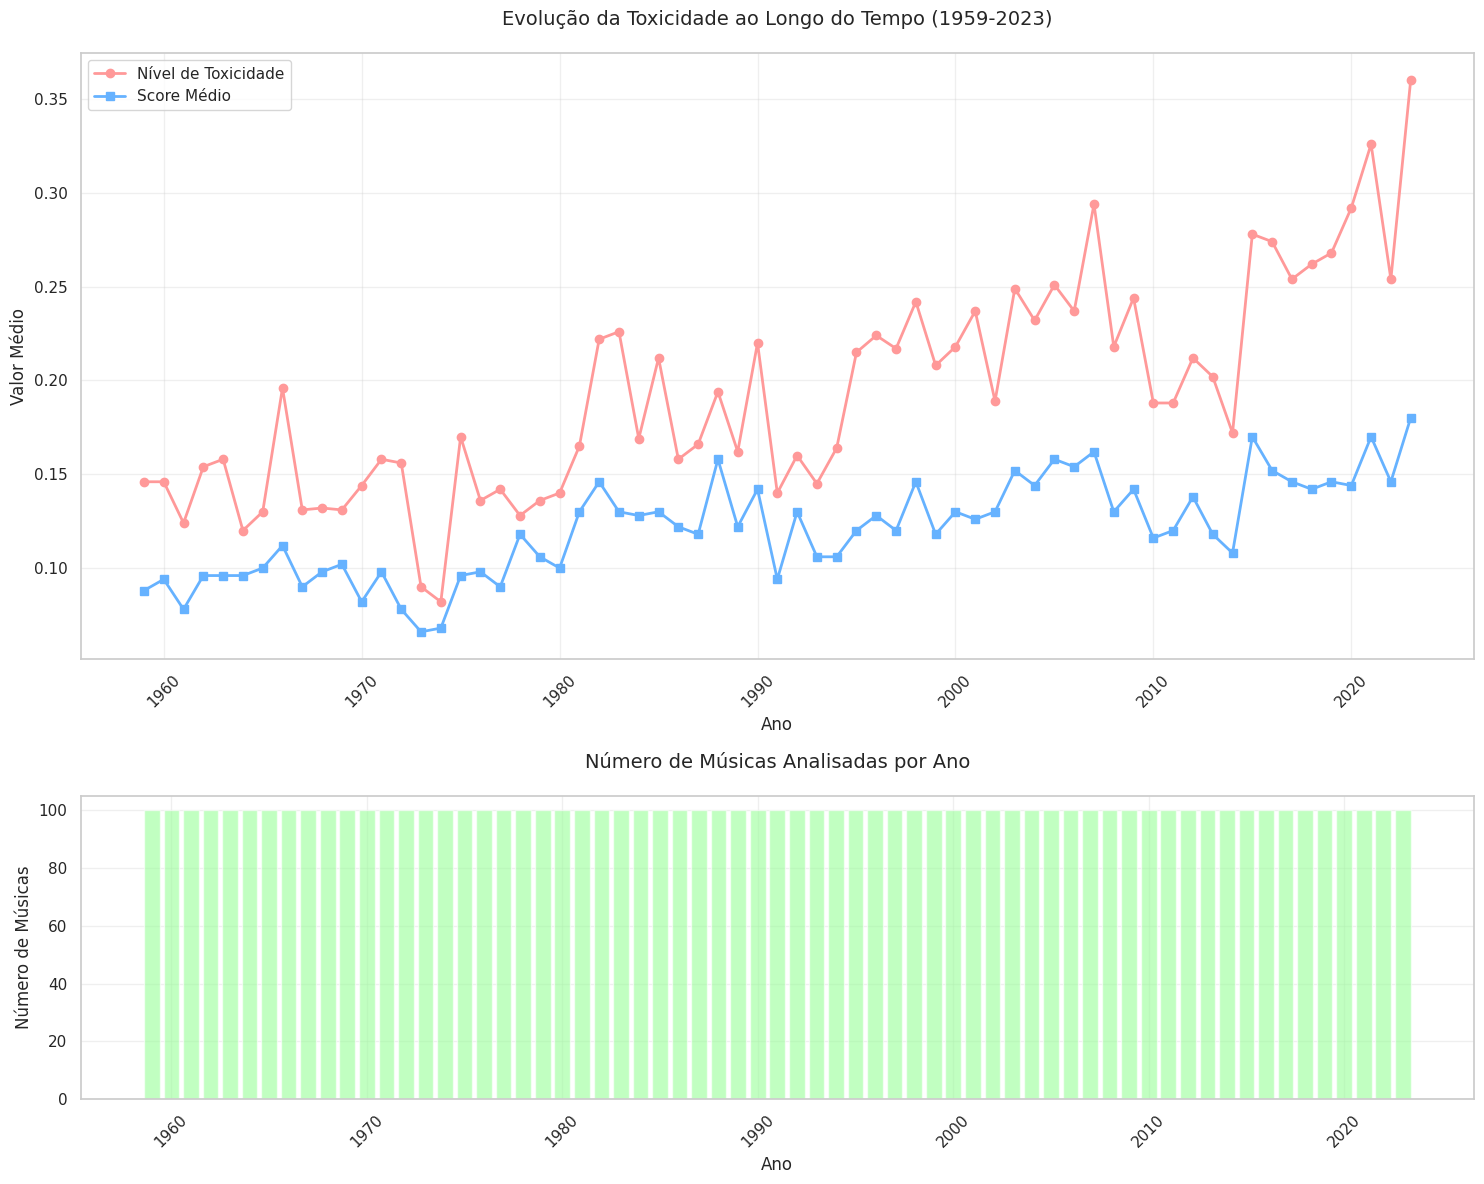


Evolução por Década:

Década de 1950:
Número de músicas: 100
Nível de Toxicidade: 14.6% (±23.8%)
Score Médio: 8.8%

Década de 1960:
Número de músicas: 1,000
Nível de Toxicidade: 14.2% (±23.7%)
Score Médio: 9.6%

Década de 1970:
Número de músicas: 1,000
Nível de Toxicidade: 13.4% (±23.3%)
Score Médio: 9.0%

Década de 1980:
Número de músicas: 1,000
Nível de Toxicidade: 18.1% (±24.4%)
Score Médio: 12.8%

Década de 1990:
Número de músicas: 1,000
Nível de Toxicidade: 19.4% (±27.2%)
Score Médio: 12.1%

Década de 2000:
Número de músicas: 1,000
Nível de Toxicidade: 23.7% (±30.0%)
Score Médio: 14.3%

Década de 2010:
Número de músicas: 1,000
Nível de Toxicidade: 23.0% (±30.2%)
Score Médio: 13.6%

Década de 2020:
Número de músicas: 400
Nível de Toxicidade: 30.8% (±32.6%)
Score Médio: 16.0%

Médias por Tipo de Toxicidade em Cada Década:

Década de 1950:
- Abuso Emocional: 10.0%
- Ciúme e Possessividade: 29.0%
- Dependência Emocional: 3.0%
- Objetificação: 1.0%
- Violência e Traição: 1.0%

Década 

In [30]:
# Análise temporal do conteúdo tóxico
yearly_stats = df.groupby('ano').agg({
    'nivel_numerico': 'mean',
    'score_medio': 'mean',
    'titulo': 'count'
}).rename(columns={'titulo': 'num_musicas'})

# Criar figura com dois subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), height_ratios=[2, 1])

# 1. Evolução do nível e score médio de toxicidade
ax1.plot(yearly_stats.index, yearly_stats['nivel_numerico'], 
         marker='o', label='Nível de Toxicidade', color='#FF9999', linewidth=2)
ax1.plot(yearly_stats.index, yearly_stats['score_medio'],
         marker='s', label='Score Médio', color='#66B2FF', linewidth=2)
ax1.set_title('Evolução da Toxicidade ao Longo do Tempo (1959-2023)', fontsize=14, pad=20)
ax1.set_xlabel('Ano', fontsize=12)
ax1.set_ylabel('Valor Médio', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 2. Número de músicas por ano
ax2.bar(yearly_stats.index, yearly_stats['num_musicas'], color='#99FF99', alpha=0.6)
ax2.set_title('Número de Músicas Analisadas por Ano', fontsize=14, pad=20)
ax2.set_xlabel('Ano', fontsize=12)
ax2.set_ylabel('Número de Músicas', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Análise por década
df['decada'] = (df['ano'] // 10) * 10
decade_stats = df.groupby('decada').agg({
    'nivel_numerico': ['mean', 'std'],
    'score_medio': 'mean',
    'titulo': 'count'
})

print("\nEvolução por Década:")
for decade in sorted(df['decada'].unique()):
    stats = decade_stats.loc[decade]
    num_musicas = stats[('titulo', 'count')]
    nivel_medio = stats[('nivel_numerico', 'mean')]
    nivel_std = stats[('nivel_numerico', 'std')]
    score_medio = stats[('score_medio', 'mean')]
    
    print(f"\nDécada de {decade:.0f}:")
    print(f"Número de músicas: {num_musicas:,.0f}")
    print(f"Nível de Toxicidade: {nivel_medio:.1%} (±{nivel_std:.1%})")
    print(f"Score Médio: {score_medio:.1%}")

# Análise dos tipos de toxicidade por década
decade_types = df.groupby('decada')[toxic_columns].mean()
print("\nMédias por Tipo de Toxicidade em Cada Década:")
for decade in sorted(df['decada'].unique()):
    print(f"\nDécada de {decade:.0f}:")
    for col, col_pt in zip(toxic_columns, toxic_columns_pt):
        mean = decade_types.loc[decade, col]
        print(f"- {col_pt}: {mean:.1%}")


## Rankings e Análise por Artista

Vamos analisar:
1. Top artistas com maior conteúdo tóxico em suas músicas
2. Distribuição de conteúdo tóxico por artista
3. Músicas mais tóxicas do dataset


/var/folders/xs/f2rzf2057gs7d9ngyzcvg0qm0000gn/T/ipykernel_93337/1185522653.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = top_artists[('nivel_numerico', 'count')][i]
/var/folders/xs/f2rzf2057gs7d9ngyzcvg0qm0000gn/T/ipykernel_93337/1185522653.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  std = top_artists[('nivel_numerico', 'std')][i]


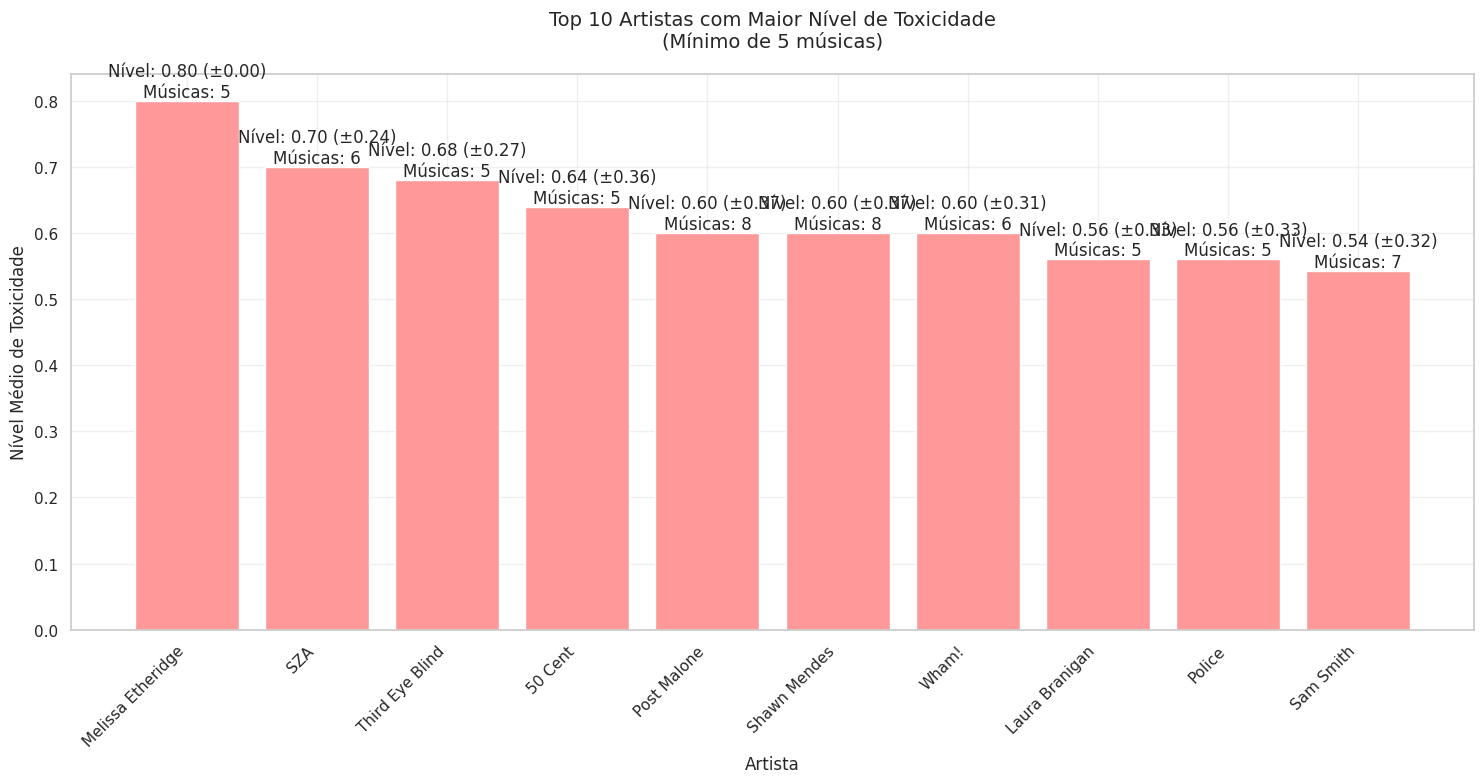


Top 10 Músicas Mais Tóxicas:


,Título,Artista,Ano,Nível,Valor Numérico,Score Médio,Abuso Emocional,Ciúme e Possessividade,Dependência Emocional,Objetificação,Violência e Traição
5898,Look At Me!,XXXTENTACION,2017.0,muito alto,1.0,0.8,1,1,0,1,1
9,Mr. Blue,Fleetwoods,1959.0,alto,0.8,0.4,1,0,1,0,0
27,Lipstick On Your Collar,Connie Francis,1959.0,alto,0.8,0.2,1,0,0,0,0
36,Kookie Kookie (Lend Me Your Comb),Edward Burns and Connie Stevens,1959.0,alto,0.8,0.2,1,0,0,0,0
39,Talahassee Lassie,Freddie Cannon,1959.0,alto,0.8,0.2,1,0,0,0,0
61,I've Had It,Bell Notes,1959.0,alto,0.8,0.2,1,0,0,0,0
74,Petite Fleur,Chris Barber's Jazz Band,1959.0,alto,0.8,0.2,1,0,0,0,0
80,Three Stars,Tommy Dee and Carol Kay,1959.0,alto,0.8,0.2,1,0,0,0,0
85,Manhattan Spiritual,Reg Owens Orch.,1959.0,alto,0.8,0.2,1,0,0,0,0
96,Take A Message To Mary,Everly Brothers,1959.0,alto,0.8,0.2,1,0,0,0,0


In [31]:
# Top 10 artistas com maior nível de toxicidade
artist_stats = df.groupby('artista').agg({
    'nivel_numerico': ['mean', 'std', 'count'],
    'score_medio': 'mean'
}).round(3)

# Filtrando apenas artistas com pelo menos 5 músicas
min_songs = 5
filtered_artists = artist_stats[artist_stats[('nivel_numerico', 'count')] >= min_songs]
top_artists = filtered_artists.nlargest(10, ('nivel_numerico', 'mean'))

# Criando gráfico de barras para os top artistas
plt.figure(figsize=(15, 8))
bars = plt.bar(range(len(top_artists)), top_artists[('nivel_numerico', 'mean')], color='#FF9999')
plt.title(f'Top 10 Artistas com Maior Nível de Toxicidade\n(Mínimo de {min_songs} músicas)', fontsize=14, pad=20)
plt.xlabel('Artista', fontsize=12)
plt.ylabel('Nível Médio de Toxicidade', fontsize=12)
plt.xticks(range(len(top_artists)), top_artists.index, rotation=45, ha='right')

# Adicionar valores nas barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    count = top_artists[('nivel_numerico', 'count')][i]
    std = top_artists[('nivel_numerico', 'std')][i]
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'Nível: {height:.2f} (±{std:.2f})\nMúsicas: {count:.0f}',
             ha='center', va='bottom')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Top 10 músicas mais tóxicas
print("\nTop 10 Músicas Mais Tóxicas:")
top_songs = df.nlargest(10, 'nivel_numerico')[['titulo', 'artista', 'ano', 'nivel_toxicidade', 'nivel_numerico', 'score_medio'] + toxic_columns]
top_songs.columns = ['Título', 'Artista', 'Ano', 'Nível', 'Valor Numérico', 'Score Médio'] + toxic_columns_pt
display(top_songs.round(3))


## Conclusões e Insights

Vamos analisar algumas correlações e padrões interessantes encontrados nos dados:xq


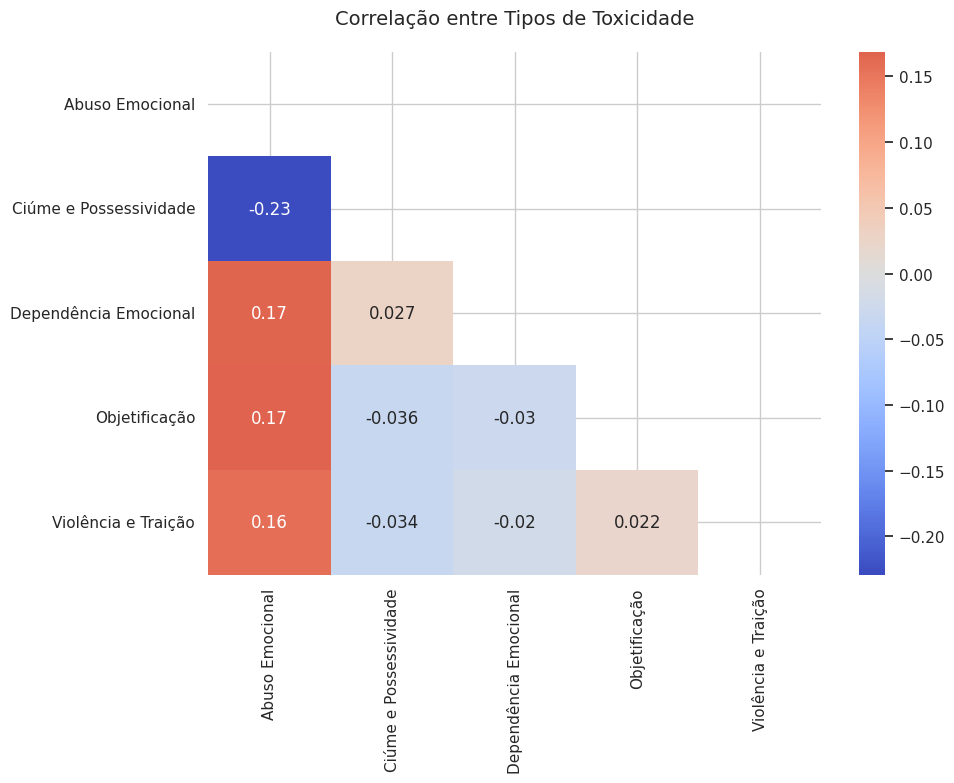


Estatísticas Gerais do Dataset:
Total de músicas analisadas: 6,500
Período analisado: 1959 - 2023
Número de artistas únicos: 3,181

Porcentagem de músicas com algum tipo de toxicidade: 51.8%

Distribuição dos tipos de toxicidade:
Abuso Emocional: 15.4%
Ciúme e Possessividade: 35.7%
Dependência Emocional: 5.2%
Objetificação: 3.6%
Violência e Traição: 0.7%

Análise dos Níveis de Toxicidade:
Nível médio: 0.193
Nível mediano: 0.200
Nível máximo: 1.000
Nível mínimo: 0.000


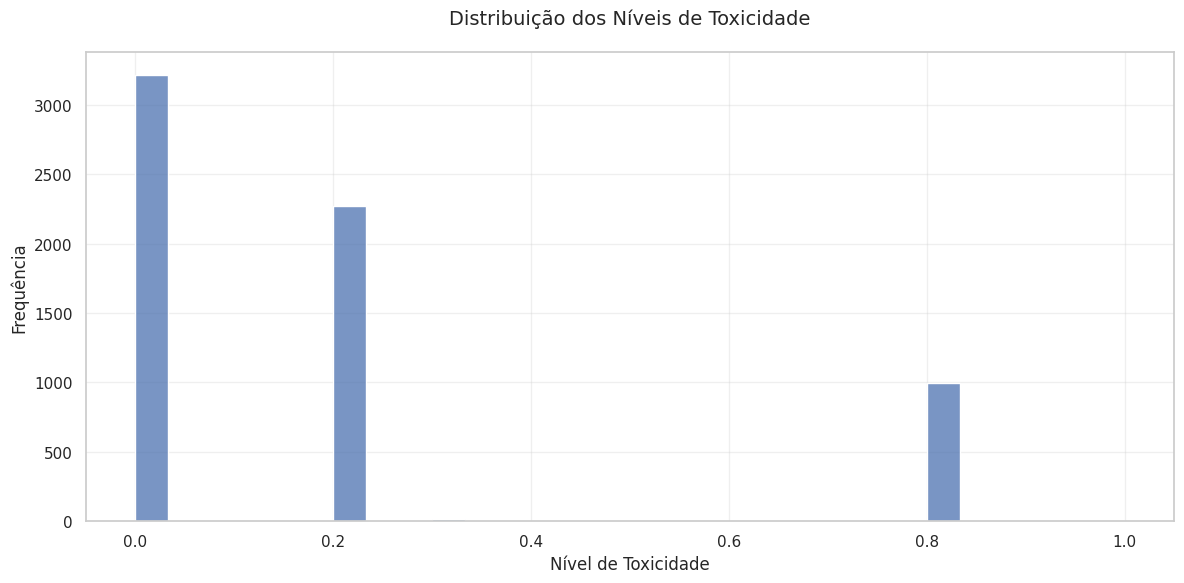

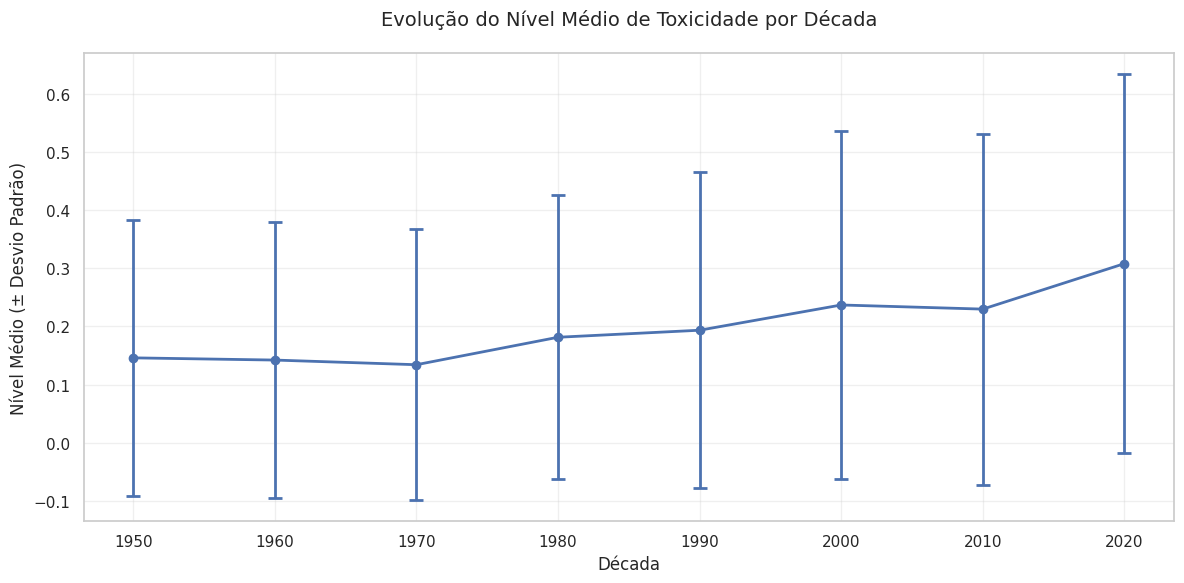

In [32]:
# Matriz de correlação entre os tipos de toxicidade
plt.figure(figsize=(10, 8))
corr_matrix = df[toxic_columns].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True,
            cmap='coolwarm',
            center=0,
            xticklabels=toxic_columns_pt,
            yticklabels=toxic_columns_pt)
plt.title('Correlação entre Tipos de Toxicidade', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Estatísticas gerais
print("\nEstatísticas Gerais do Dataset:")
print(f"Total de músicas analisadas: {len(df):,}")
print(f"Período analisado: {df['ano'].min():.0f} - {df['ano'].max():.0f}")
print(f"Número de artistas únicos: {df['artista'].nunique():,}")

# Porcentagem de músicas com algum tipo de toxicidade
has_toxicity = df[toxic_columns].any(axis=1)
toxicity_percentage = (has_toxicity.sum() / len(df)) * 100

print(f"\nPorcentagem de músicas com algum tipo de toxicidade: {toxicity_percentage:.1f}%")

# Distribuição dos tipos de toxicidade
print("\nDistribuição dos tipos de toxicidade:")
for col, col_pt in zip(toxic_columns, toxic_columns_pt):
    perc = (df[col].sum() / len(df)) * 100
    print(f"{col_pt}: {perc:.1f}%")

# Análise dos níveis de toxicidade
print("\nAnálise dos Níveis de Toxicidade:")
print(f"Nível médio: {df['nivel_numerico'].mean():.3f}")
print(f"Nível mediano: {df['nivel_numerico'].median():.3f}")
print(f"Nível máximo: {df['nivel_numerico'].max():.3f}")
print(f"Nível mínimo: {df['nivel_numerico'].min():.3f}")

# Distribuição dos níveis
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='nivel_numerico', bins=30)
plt.title('Distribuição dos Níveis de Toxicidade', fontsize=14, pad=20)
plt.xlabel('Nível de Toxicidade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Evolução do nível médio por década
decade_scores = df.groupby('decada')['nivel_numerico'].agg(['mean', 'std', 'count'])
plt.figure(figsize=(12, 6))
plt.errorbar(decade_scores.index, 
            decade_scores['mean'], 
            yerr=decade_scores['std'],
            fmt='o-',
            capsize=5,
            capthick=2,
            linewidth=2)
plt.title('Evolução do Nível Médio de Toxicidade por Década', fontsize=14, pad=20)
plt.xlabel('Década', fontsize=12)
plt.ylabel('Nível Médio (± Desvio Padrão)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Evolução da Toxicidade ao Longo do Tempo

Vamos analisar como a presença de conteúdo tóxico evoluiu nas músicas ao longo das décadas:



Evolução da Toxicidade Média por Década:

Década de 1950:
Número de músicas: 100
Média de toxicidade: 0.088 ± 0.104

Década de 1960:
Número de músicas: 1,000
Média de toxicidade: 0.096 ± 0.124

Década de 1970:
Número de músicas: 1,000
Média de toxicidade: 0.090 ± 0.121

Década de 1980:
Número de músicas: 1,000
Média de toxicidade: 0.128 ± 0.128

Década de 1990:
Número de músicas: 1,000
Média de toxicidade: 0.121 ± 0.127

Década de 2000:
Número de músicas: 1,000
Média de toxicidade: 0.143 ± 0.132

Década de 2010:
Número de músicas: 1,000
Média de toxicidade: 0.136 ± 0.140

Década de 2020:
Número de músicas: 400
Média de toxicidade: 0.160 ± 0.131


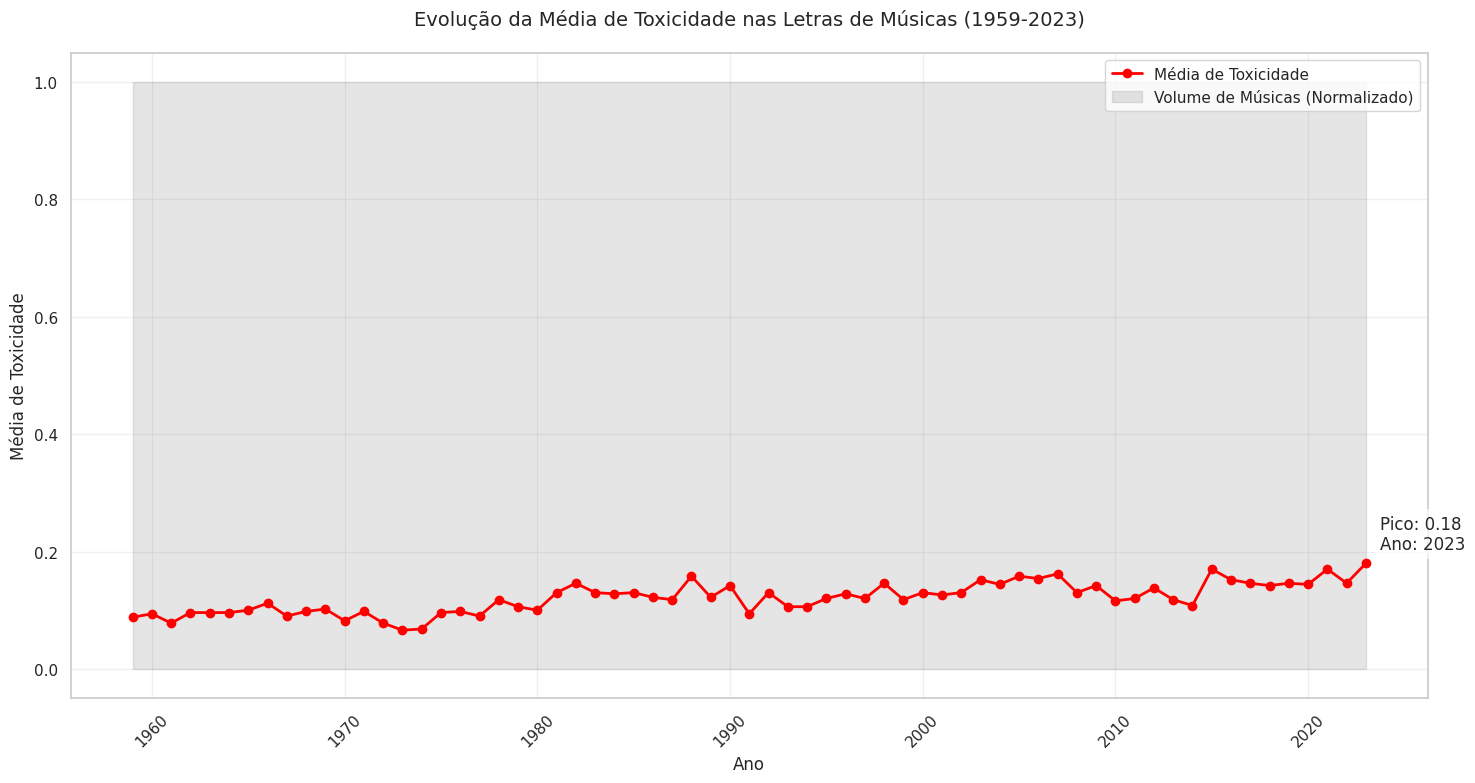

In [33]:
# Calculando a média de todos os tipos de toxicidade por ano
df['toxicity_mean'] = df[toxic_columns].mean(axis=1)  # Média dos tipos de toxicidade para cada música
yearly_toxic_means = df.groupby('ano').agg({
    'toxicity_mean': 'mean',
    'titulo': 'count'  # Para contar o número de músicas
}).rename(columns={'titulo': 'num_musicas'})

# Criando o gráfico
plt.figure(figsize=(15, 8))

# Linha principal de toxicidade média
plt.plot(yearly_toxic_means.index, yearly_toxic_means['toxicity_mean'], 
         marker='o', linewidth=2, color='red', 
         label='Média de Toxicidade')

# Área sombreada para o número de músicas
plt.fill_between(yearly_toxic_means.index, 
                 0, 
                 yearly_toxic_means['num_musicas'] / yearly_toxic_means['num_musicas'].max(),
                 alpha=0.2, color='gray',
                 label='Volume de Músicas (Normalizado)')

# Configurações do gráfico
plt.title('Evolução da Média de Toxicidade nas Letras de Músicas (1959-2023)', fontsize=14, pad=20)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Média de Toxicidade', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Adicionar anotações para picos importantes
max_year = yearly_toxic_means['toxicity_mean'].idxmax()
max_value = yearly_toxic_means['toxicity_mean'].max()
plt.annotate(f'Pico: {max_value:.2f}\nAno: {max_year:.0f}',
            xy=(max_year, max_value),
            xytext=(10, 10),
            textcoords='offset points',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Legenda
plt.legend(loc='upper right')

# Estatísticas por década
print("\nEvolução da Toxicidade Média por Década:")
decade_stats = df.groupby('decada').agg({
    'toxicity_mean': ['mean', 'std'],
    'titulo': 'count'
})

for decade in sorted(df['decada'].unique()):
    stats = decade_stats.loc[decade]
    num_musicas = stats[('titulo', 'count')]
    media = stats[('toxicity_mean', 'mean')]
    desvio = stats[('toxicity_mean', 'std')]
    
    print(f"\nDécada de {decade:.0f}:")
    print(f"Número de músicas: {num_musicas:,.0f}")
    print(f"Média de toxicidade: {media:.3f} ± {desvio:.3f}")

plt.tight_layout()
plt.show()
